In [12]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [22]:
with open('countries.json') as json_file:
    data = json.load(json_file)
print(data)

{'Countries': [{'Area (km^2)': 7692024, 'Median Age': 38, 'Name': 'Australia', 'Population': 25910700}, {'Area (km^2)': 130170, 'Median Age': 28, 'Name ': 'Bangladesh', 'Population': 210147125}, {'Area (km^2)': 8515767, 'Median Age': 33, 'Name': 'Brazil', 'Population ': 210147125}, {'Area (km^2)': 9984670, 'Median Age ': 41, 'Name': 'Canada', 'Population': 3246108}, {'Area (km^2)': 9596961, 'Median Age ': 38, 'Name': 'China', 'Population ': 1411778724}, {'Area (km^2)': 2267050, 'Median Age ': 17, 'Name ': 'DR Congo', 'Population': 89561403}, {'Area (km^2)': 995450, 'Median Age ': 25, 'Name': 'Egypt', 'Population ': 102334404}, {'Area (km^2)': 1000000, 'Median Age ': 19, 'Name': 'Ethiopia', 'Population ': 114963588}, {'Area (km^2)': 547557, 'Median Age': 42, 'Name': 'France', 'Population': 67273511}, {'Area (km^2)': 348560, 'Median Age': 46, 'Name': 'Germany', 'Population': 83783942}, {'Area (km^2)': 3287263, 'Median Age': 28, 'Name': 'India', 'Population': 1399383625}, {'Area (km^2)': 

In [24]:
countries = data['Countries']
data_file = open('Countries.csv', 'w')
csv_writer = csv.writer(data_file)
csv_writer.writerow(countries[0].keys())
for country in countries:
    csv_writer.writerow(country.values())
data_file.close()

In [25]:
df = pd.read_csv('countries.csv')
df

,Area (km^2),Median Age,Name,Population
0,7692024,38,Australia,25910700
1,130170,28,Bangladesh,210147125
2,8515767,33,Brazil,210147125
3,9984670,41,Canada,3246108
4,9596961,38,China,1411778724
5,2267050,17,DR Congo,89561403
6,995450,25,Egypt,102334404
7,1000000,19,Ethiopia,114963588
8,547557,42,France,67273511
9,348560,46,Germany,83783942


In [26]:
df.loc[df['Name'] == 'Nigeria']
df.drop(4, inplace=True)
df

,Area (km^2),Median Age,Name,Population
0,7692024,38,Australia,25910700
1,130170,28,Bangladesh,210147125
2,8515767,33,Brazil,210147125
3,9984670,41,Canada,3246108
5,2267050,17,DR Congo,89561403
6,995450,25,Egypt,102334404
7,1000000,19,Ethiopia,114963588
8,547557,42,France,67273511
9,348560,46,Germany,83783942
10,3287263,28,India,1399383625


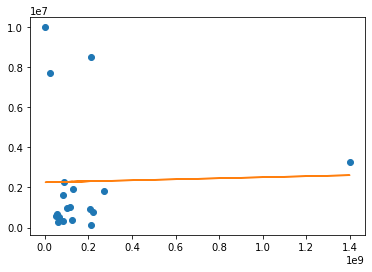

In [27]:
x = 'Population'
y = 'Area (km^2)'
plt.plot(x, y, data=df, linestyle='none', marker='o')
m, b = np.polyfit(df[x], df[y], 1)
plt.plot(df[x], m * df[x] + b)
plt.show()

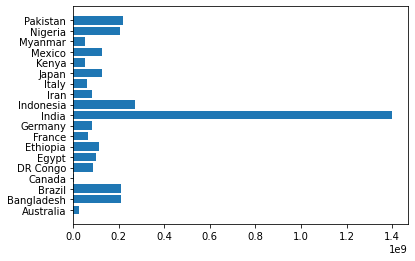

In [28]:
yards = df['Population']
bars = df['Name']
y_pos = np.arange(len(bars))

# Create bars
plt.barh(y_pos, yards)

# Create names on the x-axis
plt.yticks(y_pos, bars)

# Show graphic
plt.show()

In [30]:
y = df[['Area (km^2)']]
x = df[["Median Age", "Population"]]
OLS = sm.OLS(y, x).fit()
print(OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:            Area (km^2)   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.333
Method:                 Least Squares   F-statistic:                              5.744
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                      0.0124
Time:                        17:37:50   Log-Likelihood:                         -309.47
No. Observations:                  19   AIC:                                      622.9
Df Residuals:                      17   BIC:                                      624.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/arielmonson/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [31]:
df.corr()

,Area (km^2),Median Age,Population
Area (km^2),1.000000,0.174528,0.025554
Median Age,0.174528,1.000000,-0.158638
Population,0.025554,-0.158638,1.000000


So there is no correlation between Area and Population as well as Median Age and Population. There is a weak correlation between Area and Median Age. From my bar graph, we can that by far, India has the largest population, and Indonesia is trailing, but at a much lower value. From the regression, we can accept the null hypothesis that there is a relationship between median age and population. 